In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway, kruskal
import os

In [2]:
# Define the countries and their corresponding files
countries = {
    "Benin": "../data/benin_clean.csv",
    "Sierraleone": "../data/sierraleone_clean.csv",
    "Togo": "../data/togo_clean.csv"
}

In [3]:
# Load and combine the datasets with a new 'Country' column
df_list = []
for country, file_path in countries.items():
    df = pd.read_csv(file_path)
    df["Country"] = country
    df_list.append(df)

combined_df = pd.concat(df_list, ignore_index=True)

C:\Users\Time\AppData\Local\Temp\ipykernel_18356\940968300.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=combined_df, x='Country', y=metric, palette='Set2')


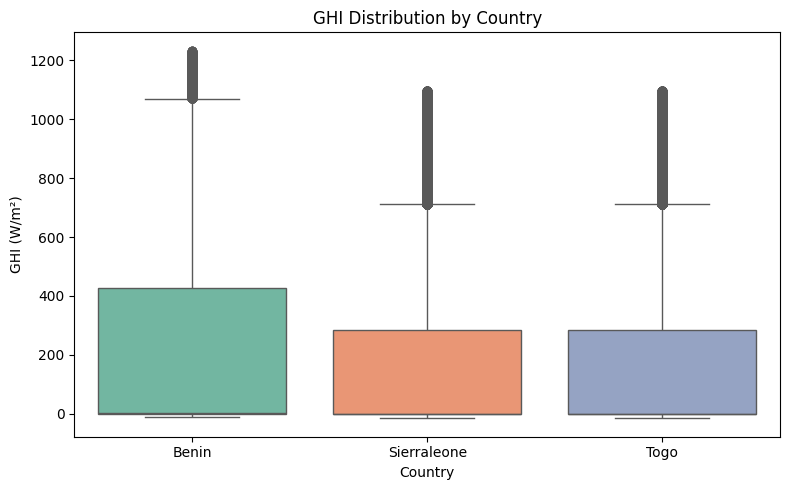

C:\Users\Time\AppData\Local\Temp\ipykernel_18356\940968300.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=combined_df, x='Country', y=metric, palette='Set2')


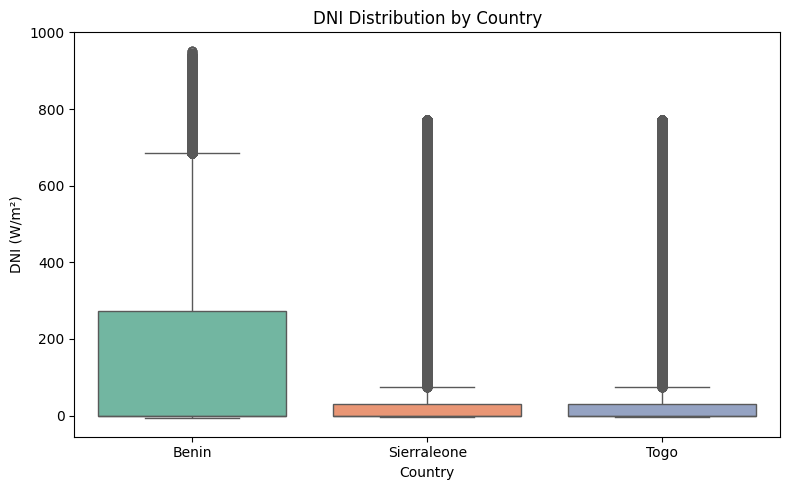

C:\Users\Time\AppData\Local\Temp\ipykernel_18356\940968300.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=combined_df, x='Country', y=metric, palette='Set2')


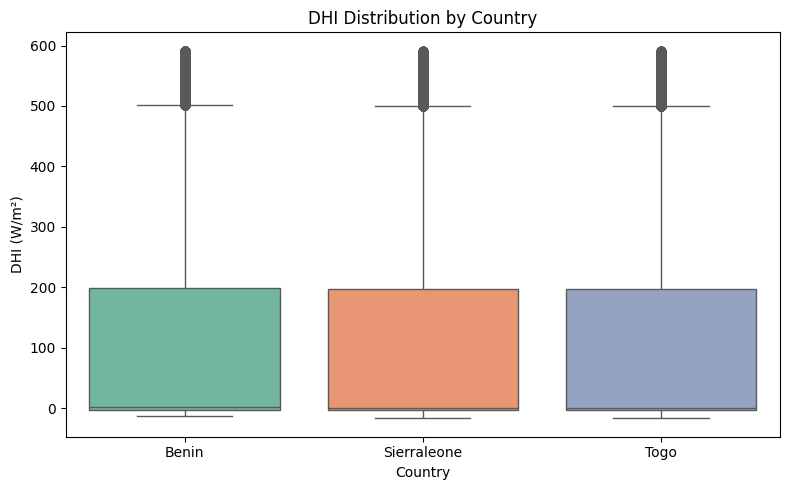

In [4]:
# Ensure columns GHI, DNI, DHI exist
metrics = ['GHI', 'DNI', 'DHI']

# ========== Boxplots ==========
for metric in metrics:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=combined_df, x='Country', y=metric, palette='Set2')
    plt.title(f'{metric} Distribution by Country')
    plt.ylabel(f'{metric} (W/m²)')
    plt.xlabel('Country')
    plt.tight_layout()
    plt.show()

In [5]:
# ========== Summary Table ==========
summary = combined_df.groupby("Country")[metrics].agg(['mean', 'median', 'std']).round(2)
summary.columns = ['_'.join(col).strip() for col in summary.columns.values]
print("Summary Table:\n")
print(summary)

Summary Table:

             GHI_mean  GHI_median  GHI_std  DNI_mean  DNI_median  DNI_std  \
Country                                                                     
Benin          221.58         1.8   321.41    156.61        -0.1   256.61   
Sierraleone    166.52         0.3   267.93     92.15        -0.1   190.85   
Togo           166.52         0.3   267.93     92.15        -0.1   190.85   

             DHI_mean  DHI_median  DHI_std  
Country                                     
Benin          105.31         1.6   150.58  
Sierraleone     99.10        -0.1   150.52  
Togo            99.10        -0.1   150.52  


In [6]:
# Extract GHI values grouped by country
ghi_groups = [group['GHI'].dropna().values for name, group in combined_df.groupby("Country")]


In [7]:
anova_stat, anova_p = f_oneway(*ghi_groups)
print(f"One-way ANOVA p-value: {anova_p:.5f}")


One-way ANOVA p-value: 0.00000


In [8]:
kruskal_stat, kruskal_p = kruskal(*ghi_groups)
print(f"Kruskal–Wallis p-value: {kruskal_p:.5f}")


Kruskal–Wallis p-value: 0.00000


### Key Observations

- **Benin** exhibits the **highest mean and median GHI** (221.58 and 1.8), indicating strong solar potential, but also shows the **highest variability** (std = 321.41), suggesting inconsistent solar energy availability.
- **Sierra Leone and Togo** have **identical solar metrics**, both with the **lowest median values** for GHI, DNI, and DHI (mostly near 0), suggesting limited and less reliable solar resources.
- The **ANOVA and Kruskal–Wallis tests returned p-values < 0.00001**, confirming that **differences in GHI across countries are statistically significant**.

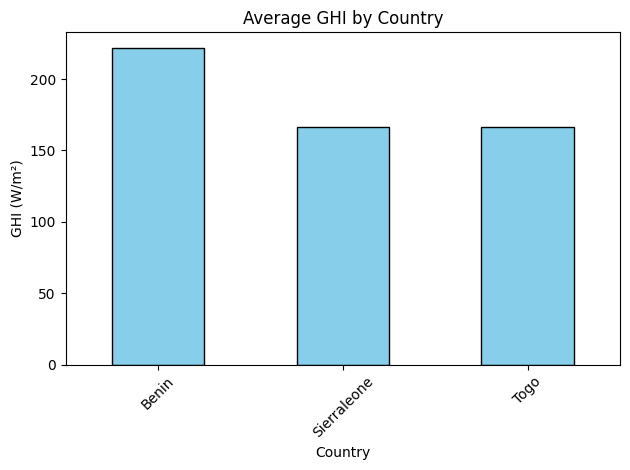

In [9]:
summary['GHI_mean'].sort_values(ascending=False).plot(
    kind='bar',
    color='skyblue',
    edgecolor='black'
)

plt.title('Average GHI by Country')
plt.ylabel('GHI (W/m²)')
plt.xlabel('Country')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()